In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# load

## model

In [2]:
from tensorflow.keras.models import load_model
vgg = load_model('/content/drive/MyDrive/1조/DS/성국/models/except_hurt_aug.h5')
xcep = load_model('/content/drive/MyDrive/1조/DS/성국/models/except_hurt_Xception_aug.h5')

In [3]:
vgg._name = 'vgg'
xcep._name = 'xcep'

In [4]:
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model

im_input = Input(shape=(206,278,3))
x1 = vgg(im_input)
x2 = xcep(im_input)
output = 0.75*x1 + 0.25 * x2
model = Model(im_input, output)

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 206, 278, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg (Sequential)               (None, 6)            21007942    ['input_1[0][0]']                
                                                                                                  
 xcep (Sequential)              (None, 6)            53893422    ['input_1[0][0]']                
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 6)            0           ['vgg[0][0]']                

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=2e-5),
              metrics = ['acc'])

## test data

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/test_by_class_except_hurt.zip'

-rw------- 1 root root 278405508 Nov  9 05:55 '/content/drive/My Drive/Colab Notebooks/datasets/test_by_class_except_hurt.zip'


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/except_hurt.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_░°░°╜├╝│_┴╛▒│_└╟╖с╜├╝│_20210122185121-001-004.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╡╡╜╔ ╚п░ц_20210122185346-008-011.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╗є╛ў╜├╝│_┴б╞ў_╜├└х_20210122185217-003-015.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╝ў╣┌ ╣╫ ░┼┴╓░°░г_20210122173113-010-003.jpg  
  inflating: train/neutrality/1f75545eb58a1cfdcbcfa750a78c9f936b749dfb83b0dbc1e9a98e830ccac6c0_┐й_20_┴▀╕│_╜║╞ў├ў ░№╢ў ╣╫ ╖╣└·╜├╝│_20210122185231-004-003.jpg  
  inflating: train/neutrality/1f830bb52573ddb5f8913e0c233cb34b2847050021b5fe8e4e91f3f2f121e3c5_│▓_20_┴▀╕│_▒│┼ы_└╠╡┐╝Ў┤▄(┐д╕о║г└╠┼═ ╞ў╟╘)_20210203121141-002-005.jpg  
  inflating: train/neutrality/

In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/test_by_class_except_hurt.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/test_by_class_except_hurt.zip
   creating: anger_test/anger/
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы_░°░°╜├╝│&┴╛▒│&└╟╖с╜├╝│_20201202163017-001-010.jpeg  
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы_░°░°╜├╝│&┴╛▒│&└╟╖с╜├╝│_20201202163017-001-019.jpeg  
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы_▒│┼ы&└╠╡┐╝Ў┤▄(┐д╕о║г└╠┼═ ╞ў╟╘)_20201202163029-002-004.jpg  
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы_╡╡╜╔ ╚п░ц_20201202163219-008-002.jpeg  
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы_╡╡╜╔ ╚п░ц_20201202163219-008-004.jpeg  
  inflating: anger_test/anger/ef1273e305b006302e94c2cfc36e7f127cbef54a7262a28b8d17105ae499d04b_┐й_20_║╨│ы

In [ ]:
train_dir = 'train'
valid_dir = 'validation'

anger_test_dir = 'anger_test'
sad_test_dir = 'sad_test'
neutrality_test_dir = 'neutrality_test'
embarrassment_test_dir = 'embarrassment_test'
happy_test_dir = 'happy_test'
unrest_test_dir = 'unrest_test'

# test by class except hurt. 500장씩

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# valid

unrest_test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(unrest_test_generator,
                                steps = 75)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 2400 images belonging to 6 classes.
75/75 [==============================] - 96s 704ms/step - loss: 1.0096 - acc: 0.6583
Loss = 1.00958
Accuracy = 0.65833


In [ ]:
# unrest

unrest_test_generator = test_datagen.flow_from_directory(
                 unrest_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(unrest_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 20s 1s/step - loss: 1.5761 - acc: 0.3340
Loss = 1.57613
Accuracy = 0.33400


In [ ]:
# anger

anger_test_generator = test_datagen.flow_from_directory(
                 anger_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(anger_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 12s 697ms/step - loss: 1.2714 - acc: 0.5640
Loss = 1.27140
Accuracy = 0.56400


In [ ]:
# sad

sad_test_generator = test_datagen.flow_from_directory(
                 sad_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(sad_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 11s 683ms/step - loss: 1.4486 - acc: 0.5520
Loss = 1.44855
Accuracy = 0.55200


In [ ]:
# neutrality

neutrality_test_generator = test_datagen.flow_from_directory(
                 neutrality_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(neutrality_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 12s 700ms/step - loss: 0.9062 - acc: 0.6820
Loss = 0.90623
Accuracy = 0.68200


In [ ]:
# embarrassment

embarrassment_test_generator = test_datagen.flow_from_directory(
                 embarrassment_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(embarrassment_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 12s 692ms/step - loss: 0.8659 - acc: 0.7500
Loss = 0.86586
Accuracy = 0.75000


In [ ]:
# happy

happy_test_generator = test_datagen.flow_from_directory(
                 happy_test_dir,
                 target_size = (206, 278),
                 batch_size = 32,
                 class_mode = 'categorical')

loss, accuracy = model.evaluate(happy_test_generator,
                                steps = 16)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Found 500 images belonging to 6 classes.
16/16 [==============================] - 11s 680ms/step - loss: 0.3401 - acc: 0.9280
Loss = 0.34007
Accuracy = 0.92800


# test single images

In [ ]:
hap_path = '/content/drive/My Drive/Colab Notebooks/datasets/happy_test.jpg'
neu_path = '/content/drive/My Drive/Colab Notebooks/datasets/neu_test.jpg'
sad_path = '/content/drive/My Drive/Colab Notebooks/datasets/sad_test.jpg'
sad_neu_path = '/content/drive/My Drive/Colab Notebooks/datasets/sad_neu_test.jpg'
emb_path = '/content/drive/My Drive/Colab Notebooks/datasets/emb_test.jpg'
unr_path = '/content/drive/My Drive/Colab Notebooks/datasets/unrest_test.jpg'
ang_path = '/content/drive/My Drive/Colab Notebooks/datasets/anger_test.jpg'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def mk_img_tensor(img_path):
    img = image.load_img(img_path, target_size=(206, 278))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    return img_tensor

In [ ]:
import matplotlib.pyplot as plt

def percentage(test):
    plt.imshow(test[0])
    plt.show()
    print('anger:',  model.predict(test)[0][0])
    print('embarrassment:',  model.predict(test)[0][1])
    print('happy:',  model.predict(test)[0][2])
    print('neutrality:',  model.predict(test)[0][3])
    print('sad:',  model.predict(test)[0][4])
    print('unrest:',  model.predict(test)[0][5])

In [ ]:
hap_test = mk_img_tensor(hap_path)
neu_test = mk_img_tensor(neu_path)
sad_test = mk_img_tensor(sad_path)
sad_neu_test = mk_img_tensor(sad_neu_path)
emb_test = mk_img_tensor(emb_path)
unr_test = mk_img_tensor(unr_path)
ang_test = mk_img_tensor(ang_path)

(1, 206, 278, 3)
(1, 206, 278, 3)
(1, 206, 278, 3)
(1, 206, 278, 3)
(1, 206, 278, 3)
(1, 206, 278, 3)
(1, 206, 278, 3)


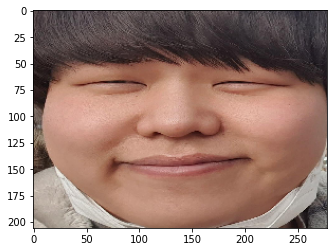

anger: 0.00015621628
embarrassment: 5.828166e-05
happy: 0.75611895
neutrality: 0.00056883204
sad: 0.2422748
unrest: 0.00082295743


In [ ]:
percentage(hap_test)

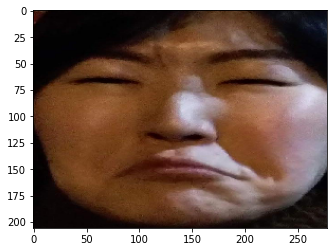

anger: 0.00019853552
embarrassment: 0.00041577563
happy: 0.0017221129
neutrality: 0.0031656697
sad: 0.99220943
unrest: 0.0022885548


In [ ]:
percentage(sad_test)

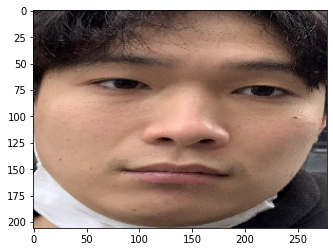

anger: 0.005090501
embarrassment: 0.009570413
happy: 0.00047379677
neutrality: 0.9190741
sad: 0.0011553094
unrest: 0.06463583


In [ ]:
percentage(neu_test)

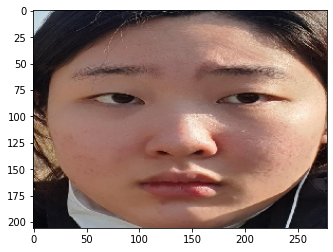

anger: 0.007029786
embarrassment: 0.7859031
happy: 0.00028920453
neutrality: 0.1437364
sad: 0.00020083657
unrest: 0.06284069


In [ ]:
percentage(sad_neu_test)

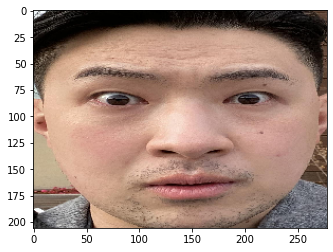

anger: 0.00013188535
embarrassment: 0.96454835
happy: 3.8057486e-05
neutrality: 0.0321378
sad: 8.139594e-05
unrest: 0.003062412


In [ ]:
percentage(emb_test)

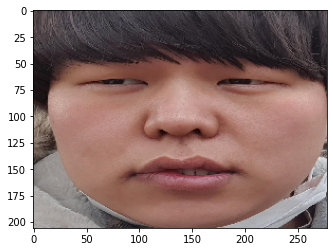

anger: 0.07729529
embarrassment: 0.059524603
happy: 0.0060131964
neutrality: 0.036294397
sad: 0.0401766
unrest: 0.78069586


In [ ]:
percentage(unr_test)

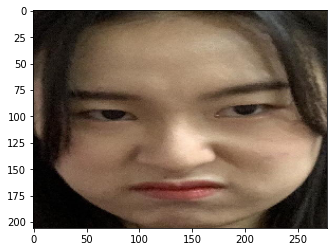

anger: 0.6377404
embarrassment: 0.0023764223
happy: 0.029505238
neutrality: 0.001929061
sad: 0.18421113
unrest: 0.14423779


In [ ]:
percentage(ang_test)